In [1]:
import os
import sys
import sklearn
import warnings
import numpy as np
import matplotlib as mpl
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

# Configs
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"
%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(42)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = '.'
GRAPHS_PATH = '../graphs/'

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_dtree(dtree, filename, feature_names, class_names, resolution=300):
    filename = filename + '.dot'
    out_file_path = os.path.join(GRAPHS_PATH, filename)
    export_graphviz(
        dtree,
        out_file = out_file_path,
        feature_names = feature_names,
        class_names = class_names,
        rounded = True,
        filled = True
    )
    dpi_setting = f'dpi = {resolution};'  # Set the desired DPI
    with open(out_file_path, "r") as dot_file:
        dot_data = dot_file.read()
    dot_data = dot_data.replace('{', '{\n\t' + dpi_setting + '\n', 1)  # Adds DPI setting right after the first brace
    with open(out_file_path, "w") as dot_file:
        dot_file.write(dot_data)
    Source.from_file(os.path.join(GRAPHS_PATH, filename))
    print(f'Successful save to {out_file_path}')

---
## Decision trees

In [3]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

save_dtree(
    dtree = tree_clf, 
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names, 
    filename='decision_trees_4'
)

Successful save to ../graphs/decision_trees_4.dot


Saving figure decision_trees_2


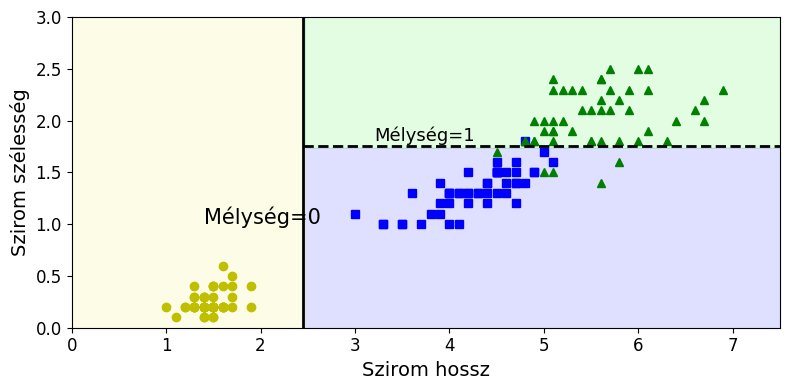

In [4]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Szirom hossz", fontsize=14)
        plt.ylabel("Szirom szélesség", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
#plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
#plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Mélység=0", fontsize=15)
plt.text(3.2, 1.80, "Mélység=1", fontsize=13)
#plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_trees_2")
plt.show()

Saving figure decision_trees_3


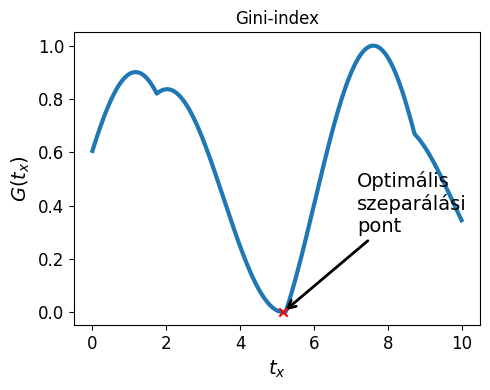

In [6]:
# To smoothen out the plot, we can increase the number of points in the curve
x_smooth = np.linspace(0, 10, 500)
y_smooth = np.sin(x_smooth) + np.abs(np.cos(x_smooth * 0.9)) * 0.5  # Use the same function for consistency
y_smooth = (y_smooth - np.min(y_smooth)) / (np.max(y_smooth) - np.min(y_smooth))

# Identify the minimum Gini index (just take the minimum value for illustration purposes) in the smooth curve
min_gini_index_smooth = np.min(y_smooth)
optimal_idx_smooth = np.argmin(y_smooth)
optimal_x_smooth = x_smooth[optimal_idx_smooth]

# Create the plot with the smooth curve
plt.figure(figsize=(5, 4))
plt.plot(x_smooth, y_smooth, label='Gini-index', linewidth=3)

# Highlight the optimal separation point with an arrow
plt.scatter(optimal_x_smooth, min_gini_index_smooth, marker='x', color='r', zorder=5)
plt.annotate(
    'Optimális\nszeparálási\npont',
    xy = (optimal_x_smooth, min_gini_index_smooth), 
    xycoords = 'data',
    xytext = (optimal_x_smooth+2, min_gini_index_smooth+0.3), 
    textcoords = 'data',
    arrowprops = dict(
        arrowstyle = "->",
        connectionstyle = "arc3",
        linewidth=2
    ),
    size=14,
)

# Set the axis labels
plt.xlabel(r'$t_x$')
plt.ylabel(r'$G(t_x)$')

# Set the title of the plot
plt.title('Gini-index')

# Show the plot
save_fig('decision_trees_3')
plt.show()


Saving figure decision_trees_4


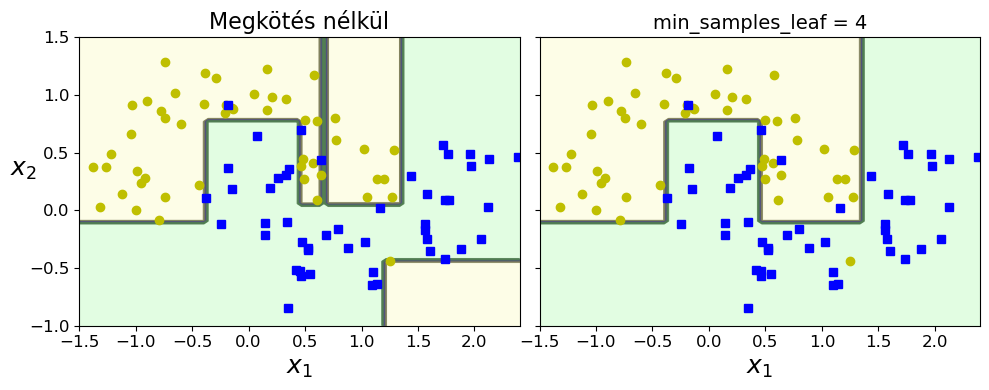

In [51]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Megkötés nélkül", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("decision_trees_4")
plt.show()

Saving figure decision_trees_5


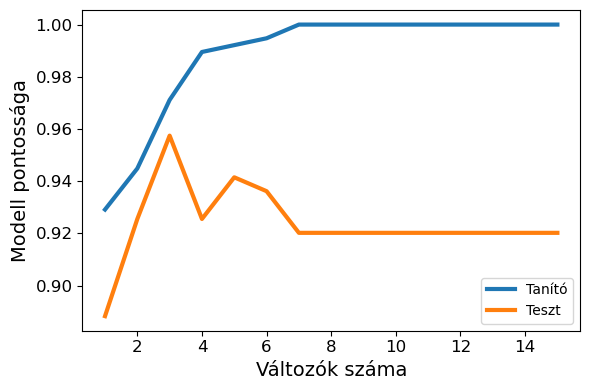

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

n_models = 15

train_accuracies, test_accuracies = [], []

for i in range(n_models):
    dtree_clf = DecisionTreeClassifier(max_depth=i+1, random_state=42)
    dtree_clf.fit(x_train, y_train)
    
    y_pred_train = dtree_clf.predict(x_train)
    y_pred_test = dtree_clf.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


indices = [i+1 for i in range(n_models)]

plt.figure(figsize=(6,4))
plt.xlabel('Változók száma')
plt.ylabel('Modell pontossága')
plt.plot(indices, train_accuracies, label='Tanító', lw=3)
plt.plot(indices, test_accuracies, label='Teszt', lw=3)
plt.legend(loc='lower right')
save_fig('decision_trees_5')
plt.show()


Saving figure decision_trees_6


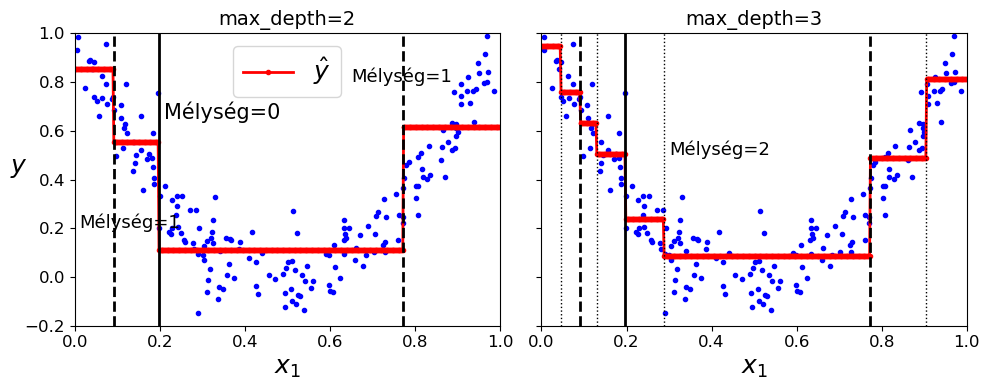

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Mélység=0", fontsize=15)
plt.text(0.01, 0.2, "Mélység=1", fontsize=13)
plt.text(0.65, 0.8, "Mélység=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Mélység=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("decision_trees_6")
plt.show()

In [70]:
save_dtree(tree_reg1, 'decision_trees_9', feature_names=['x1'], class_names=None)

Successful save to ../graphs/decision_trees_9.dot


Saving figure decision_trees_7


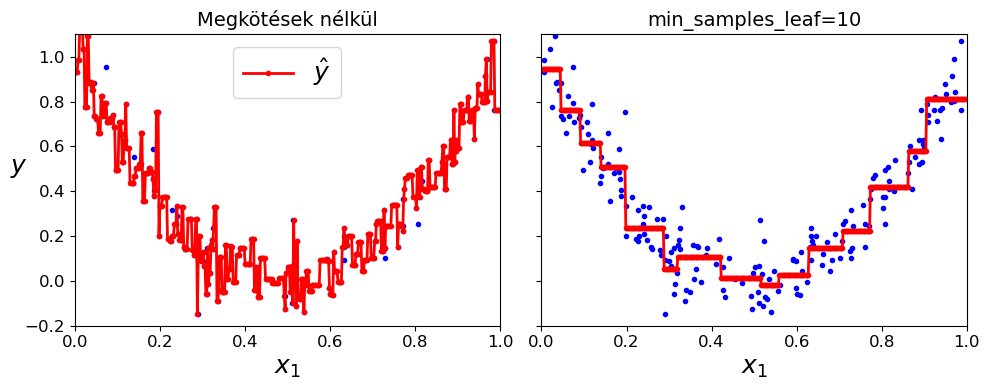

In [72]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Megkötések nélkül", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("decision_trees_7")
plt.show()

Saving figure decision_trees_8


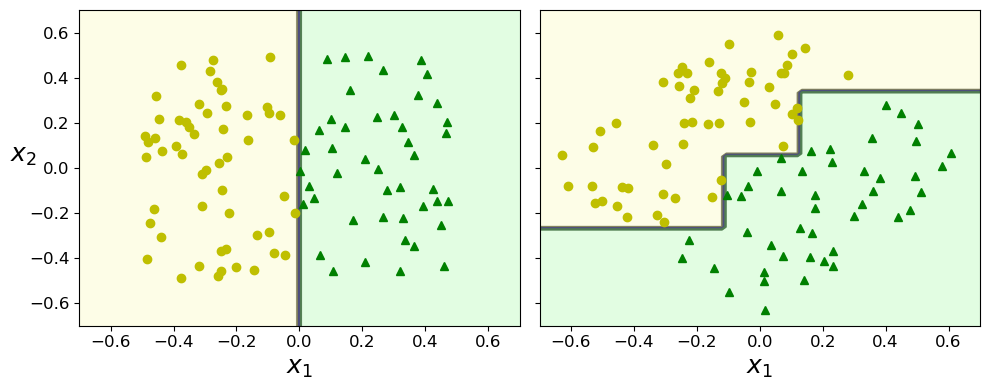

In [73]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("decision_trees_8")
plt.show()

Saving figure decision_trees_9


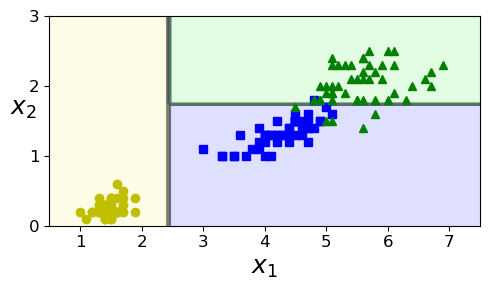

Saving figure decision_trees_10


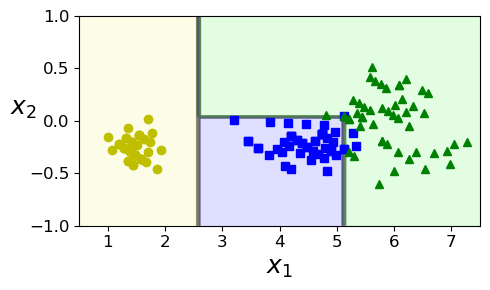

In [100]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)


plt.figure(figsize=(5, 3))
plot_decision_boundary(tree_clf, X, y, axes=[0.5, 7.5, 0, 3], iris=False)
plt.tight_layout()
plt.yticks([0, 1, 2, 3])
save_fig('decision_trees_9')
plt.show()

plt.figure(figsize=(5, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)
plt.tight_layout()
save_fig('decision_trees_10')
plt.show()

Saving figure decision_trees_11


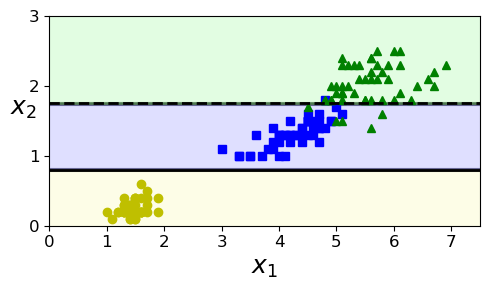

In [109]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

plt.figure(figsize=(5, 3))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False, iris=False)
plt.yticks([0, 1, 2, 3])
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
save_fig("decision_trees_11")
plt.show()